# [INTRODUCTION](#1)<br>

[1. Read datas](#2)<br>
[2. Poverty rate of each state](#3)<br>
[3. Most common 15 Name or Surname of killed people](#4)<br>
[4. High school graduation rate of the population that is older than 25 in states](#5)<br>
[5. Percentage of state's population according to races that are black,white,native american, asian and hispanic](#6)<br>
[6. High school graduation rate vs Poverty rate of each state](#7)<br>
[7. Kill properties<br>](#8)<br>
<font color ='red'>
 &emsp;Manner of death<br>
 &emsp;Kill weapon<br>
 &emsp;Age of killed people<br>
 &emsp;Race of killed people<br>
 &emsp;Most dangerous cities<br>
 &emsp;Most dangerous states<br>
 &emsp;Having mental ilness or not for killed people<br>
 &emsp;Threat types<br>
 &emsp;Flee types <br> 
 &emsp;Having body cameras or not for police<br>
8. Race rates according to states in kill data<br>
9. Kill numbers from states in kill data<br>
10. Plotly Visualization Tutorial: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners<br>
    
<font color ='blue'><br>
Plot Contents:<br>
[11. Bar Plot](#11)<br>
[12. Point Plot](#12)<br>
[13. Joint Plot](#13)<br>
[14. Pie Chart](#14)<br>
[15. Lm Plot](#15)<br>
[16. Kde Plot](#16)<br>
[17. Violin Plot](#17)<br>
[18. Heatmap](#18)<br>
[19. Box Plot](#19)<br>
[20. Swarm Plot](#20)<br>
[21. Pair Plot](#21)<br>
[22. Count Plot](#22)<br>

<a id='1'></a><br>

## INTRODUCTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fatal-police-shootings-in-the-us

/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv


In [3]:
# Read datas
median_house_hold_in_come = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv', encoding="windows-1252")

In [4]:
df=pd.DataFrame()

In [10]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [31]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [49]:
percentage_people_below_poverty_level.rename(columns={'Geographic Area': 'Geographic_Area'}, inplace=True)
percentage_people_below_poverty_level.describe()

AL=percentage_people_below_poverty_level[percentage_people_below_poverty_level.Geographic_Area=="AL"]
AL.describe()

,poverty_rate
count,585.000000
mean,20.611795
std,12.980736
min,0.000000
25%,11.100000
50%,19.100000
75%,28.800000
max,79.400000


In [12]:
percentage_people_below_poverty_level['Geographic_Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [13]:
percentage_people_below_poverty_level.poverty_rate.value_counts()


0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

0        AL
1        AL
2        AL
3        AL
4        AL
         ..
29324    WY
29325    WY
29326    WY
29327    WY
29328    WY
Name: Geographic Area, Length: 29329, dtype: object

<a id='3'></a><br>
### 2. Poverty rate of each state<br>


<a id='1'></a><br>
### 11. BARPLOT<br>

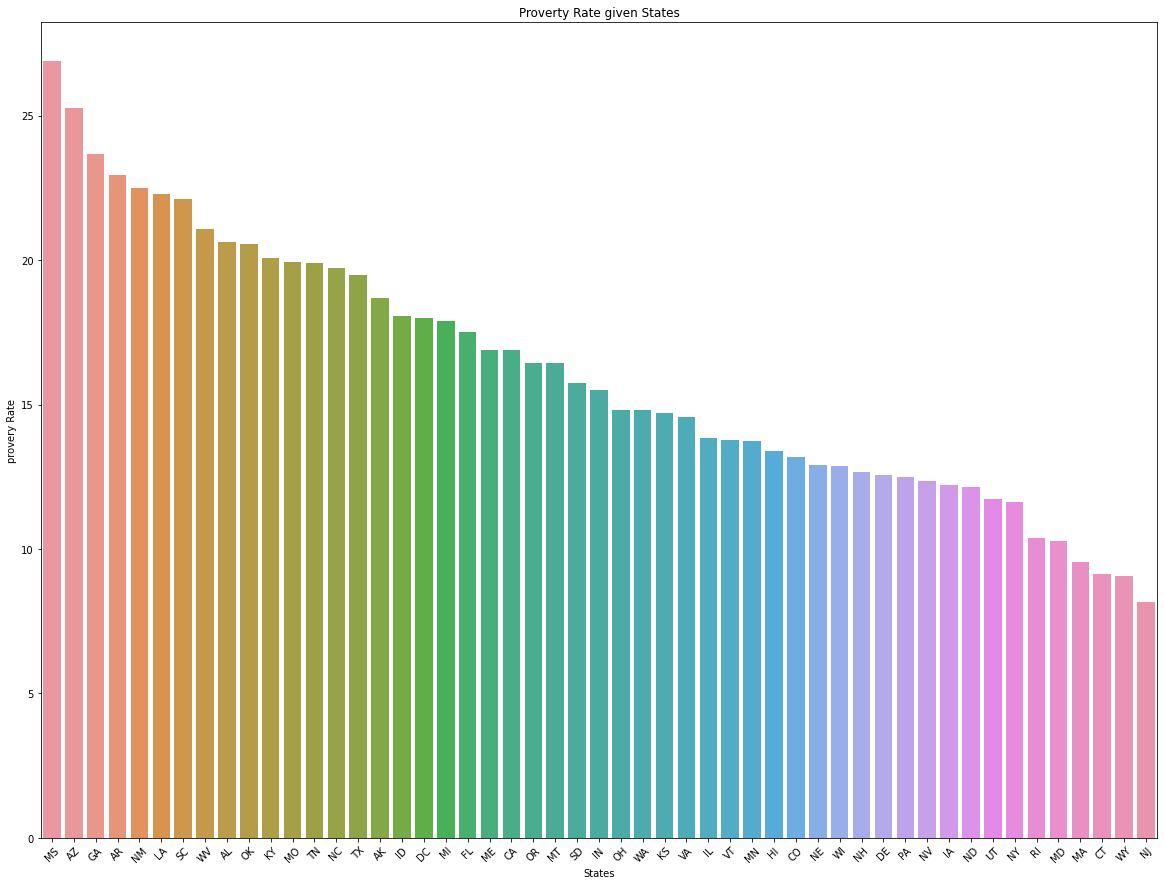

In [50]:
#Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace(["-"],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list=list(percentage_people_below_poverty_level['Geographic_Area'].unique())
area_proverty_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic_Area']==i]
    area_proverty_rate=sum(x.poverty_rate)/len(x)
    area_proverty_ratio.append(area_proverty_rate)
data=pd.DataFrame({'area_list':area_list,'area_proverty_ratio':area_proverty_ratio})
new_index=(data['area_proverty_ratio'].sort_values(ascending=False)).index.values
shorted_data=data.reindex(new_index)
#visualization
plt.figure(figsize=(20,15))
sns.barplot(x=shorted_data['area_list'],y=shorted_data['area_proverty_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('provery Rate')
plt.title('Proverty Rate given States')
plt.show()

In [45]:
data.head(51)

,area_list,area_proverty_ratio
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


Index(['Geographic Area', 'City', 'Median Income'], dtype='object')